## Evaluating a reinforcement learning AI that trades in the stock market

### Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# load stock data of sample stocks
master_card_info = pd.read_csv("stock_data/info_MA.csv")
macerich_info = pd.read_csv("stock_data/info_MAC.csv")
amazon_info = pd.read_csv("stock_data/info_AMZN.csv")
gilead_sciences_info = pd.read_csv("stock_data/info_GILD.csv")
s_and_p_500_info = pd.read_csv("stock_data/info_SPO.csv")
s_and_p_500_data = pd.read_csv("stock_data/SP.csv")

# linear regression functions, taken from my multivariate calculus portfolio
def find_averages(dataset):
    i = 0
    xt = 0
    yt = 0
    x = dataset.x
    y = dataset.y
    while(i < dataset.shape[0]):
        xt += x[i]
        yt += y[i]
        i += 1
    return((xt/dataset.shape[0]),(yt/dataset.shape[0]))
                
def find_m(xa,ya):
    numerator = 0
    denominator = 0
    
    x = dataset.x
    y = dataset.y
                
    i = 0
    while(i < dataset.shape[0]):
        numerator += (x[i]-xa)*(y[i]-ya)
        denominator += (x[i]-xa)**2
        i += 1
                
    m = numerator/denominator
    return m

### 1. Abstract
We decided to build an AI (artificial intelligence) that can trade different stocks in the stock market by using reinforcement learning. We asked ourselves if the data the AI returns is sufficient enough to reason if the AI can be used to outperform the development of stock market indices. We utilized stock chart data of the internet and prepared it for the AI in a Python application. Then, by analyzing and comparing the data results of the AI, we present key findings and use them in the discussion to answer the main question. In the end, we come to the conclusion that the data results of the AI are insufficient because of the lack of large datasets. Furthermore, we find that this problem is not solvable due to a data generation limitation.

### 2. Introduction

Trading is great way to invest and to make more money out of capital. At the same time, however, the uncertainty of price development is the key characteristic of the stock market. Peter Lynch, one of the greatest investors of the 20th century, once said: “There are economic facts and there's economic predictions and economic predictions are a total waste.”[1].
Predicting the stock market consistently is impossible. Random corrections and irrational behavior of people are the fundamentals of price theory.  

AI and, especially, machine learning have already done the impossible. They revolutionized many areas like autonomous driving, image recognition, and the ability to beat humans in different games. Next to supervised and unsupervised learning, reinforcement learning is one of the three basic machine learning paradigms. In reinforcement learning, the AI is trained to take actions in an environment to maximize a reward.  

The whole application was programmed in Python and with the help of a paper[2] of the in 2013 Google acquired company DeepMind. The paper was on deep reinforcement learning algorithms that learned to play seven Atari 2600 games, outperformed previous approaches in six of them, and human experts in three of them. The plan was to leverage this game-playing approach for training an AI that “plays” the stock market.  

The main question was whether we can use the data returned by our self-coded and self-trained AI to reason if the AI can outperform the development of stock market indices.

Our approach was simple: We started by building the reinforcement learning AI. After that, we pulled stock data off the internet and used this data to train the AI. Then, more stock data was used to evaluate the AI. The AI's decisions and performance was saved for each stock.  

This report has the following structure:  
The next section (3.) explains the data, data handeling, materials and methods we used to accomplish our plan.  
Following that (4.), I present results in form of figures and tables.  
This will then be used in the discussion (5.) where I will answer the main question that was asked.  
A short conclusion (6.) will end this report and the reference section (7.) will list referenced materials.

### 3. Data, materials and methods

The way we aquired the data of this study is straightforward. To give a clear overview, these were the steps taken:  
1. Choose stocks for training and evaluation
2. Get stock data of the internet
3. Clean the data
4. Train the AI
5. Evaluate the AI
6. Save results

#### 3.1 Choose stocks for training and evaluation:
We decided to use the S&P 500 for training the AI because it is one of the most respected indices in the world and has a well-balanced diversity of stocks. It includes 500 of the biggest listed companies in the USA.  

We decided on a five years period and daily closing prices to train the agent; from June 12, 2015, to June 11, 2020. 

Visualizing the development of the S&P500 helps to understand why I choose the other stocks.  

*(The datasets shown will be examined in 3.2, this is the step at which the data was originally first used.)*

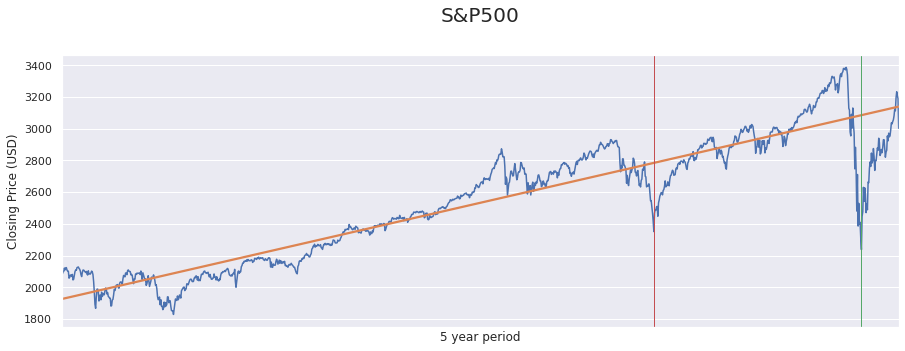

In [2]:
dataset = pd.DataFrame({"x": np.arange(1259), "y":s_and_p_500_data["Close"].astype(float)})

xa,ya = find_averages(dataset)
m = find_m(xa,ya)

c = ya-(m*xa)
x = dataset.x

reg_line = m*x+c


sns.set()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("S&P500", y=1.1, fontsize=20)

sns.lineplot(x =dataset.x, y = dataset.y, ax=ax)

sns.regplot(x=dataset.x, y=reg_line,scatter=False, ax=ax);

ax.axvline(890, color="r", linewidth=1)
ax.axvline(1202, color="g", linewidth=1)

ax.set_ylabel("Closing Price (USD)")
ax.set_xlabel("5 year period")
ax.set_xticks([])
plt.show()

**Figure 1**. Stock chart of the S&P 500 over a five year period (June 12, 2015 until June 11, 2020). Orange line shows the linear regression of the chart. Red and green line indicate two major corrections.

There are two major corrections that are noticeable. The first one (red line) is on the 21st of December 2018, the second correction (green line) is on the 23rd of March 2020. The orange line expresses the linear regression over the five year period. This will be further inspected in the discussion section (5.).

To evaluate the AI, I choose different stocks with a time period of one year (12.06.2019 until 11.06.2020). The stocks are Amazon, Master Card, Gilead Sciences, Macerich, and the S&P 500 itself.
I selected these stocks with the thought to include some that have different developments over the one year course. This does help judging the AI's performance by evaluating on a variety of datasets.  

Let us look at the developments of the individual stocks:

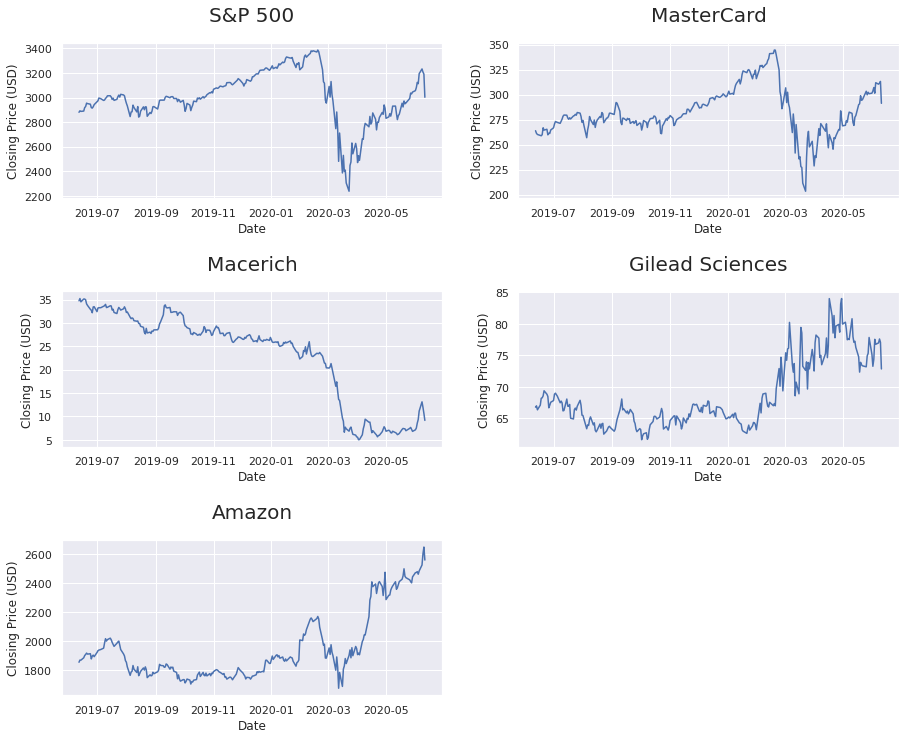

In [3]:
fig, ax = plt.subplots(figsize=(15,12), ncols=2, nrows=3)

wspace =  .2
hspace =  .6

plt.subplots_adjust(
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.lineplot(x = pd.to_datetime(s_and_p_500_info["date"]), y = s_and_p_500_info["close"].astype(float), ax=ax[0][0])
sns.lineplot(x = pd.to_datetime(amazon_info["date"]), y = amazon_info["close"].astype(float), ax=ax[2][0])
sns.lineplot(x = pd.to_datetime(master_card_info["date"]), y = master_card_info["close"].astype(float), ax=ax[0][1])
sns.lineplot(x = pd.to_datetime(macerich_info["date"]), y = macerich_info["close"].astype(float), ax=ax[1][0])
sns.lineplot(x = pd.to_datetime(gilead_sciences_info["date"]), y = gilead_sciences_info["close"].astype(float), ax=ax[1][1])

# plt.suptitle("Selected stocks", fontsize=20)
ax[0][0].set_title("S&P 500", y=1.1, fontsize=20)
ax[0][1].set_title("MasterCard", y=1.1, fontsize=20)
ax[1][0].set_title("Macerich", y=1.1, fontsize=20)
ax[1][1].set_title("Gilead Sciences", y=1.1, fontsize=20)
ax[2][0].set_title("Amazon", y=1.1, fontsize=20)
ax[2][1].axis("off")
for ax in ax.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price (USD)")

plt.show()

**Figure 2**. Stock charts of chosen stocks over the a one year period (June 12, 2019 until June 11, 2020) for the evaluation of the AI.

As we can see, the, for example, Amazon chart ranges from below 1800 USD to above 2600 USD and the Gilead Sciences chart from below 65 to almost 80.  Even though they might have a similar looking graph, the price ranges are different.  

So, to compare these even better, I normalized the prices and combined them in one plot.

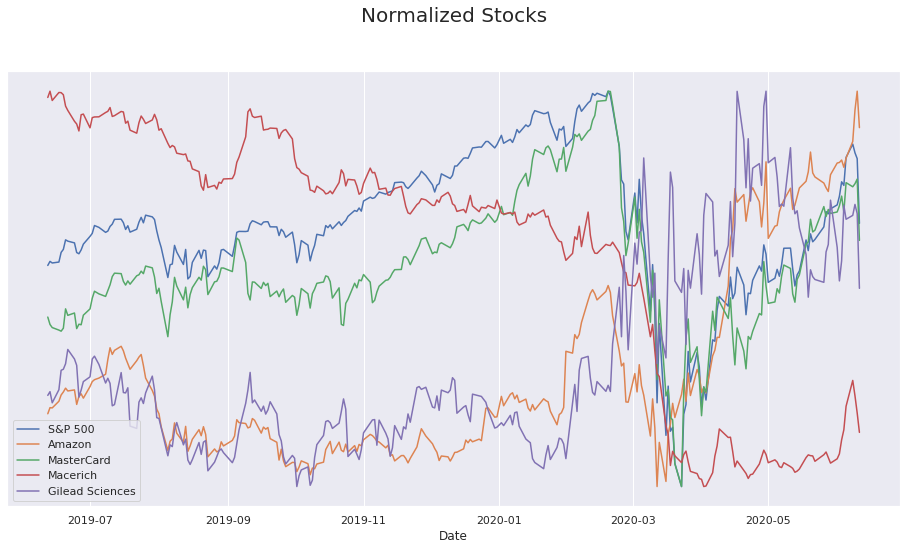

In [4]:
def norm_stock(stock):
    norm_array = stock.astype(float).values[Ellipsis, None]
    norm_array = norm_array.reshape((len(norm_array), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(norm_array)
    norm_array = scaler.transform(norm_array)
    return norm_array.flatten()

s_and_p_500_norm = norm_stock(s_and_p_500_info["close"])
amazon_norm = norm_stock(amazon_info["close"])
master_card_norm = norm_stock(master_card_info["close"])
macerich_norm = norm_stock(macerich_info["close"])
gilead_sciences_norm = norm_stock(gilead_sciences_info["close"])

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Normalized Stocks", y=1.1, fontsize=20)

sns.lineplot(x = pd.to_datetime(s_and_p_500_info["date"]), y = s_and_p_500_norm, ax=ax, label="S&P 500")
sns.lineplot(x = pd.to_datetime(amazon_info["date"]), y = amazon_norm, ax=ax, label="Amazon")
sns.lineplot(x = pd.to_datetime(master_card_info["date"]), y = master_card_norm, ax=ax, label="MasterCard")
sns.lineplot(x = pd.to_datetime(macerich_info["date"]), y = macerich_norm, ax=ax, label="Macerich")
sns.lineplot(x = pd.to_datetime(gilead_sciences_info["date"]), y = gilead_sciences_norm, ax=ax, label="Gilead Sciences")

ax.set_yticks([])
ax.set_xlabel("Date")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

**Figure 3**. Normalized stock charts for comparing their development (June 12, 2019 until June 11, 2020).

As this plot shows even better, the selected stocks do have diverse charts.

#### 3.2 Get stock data of the internet
The datasets for each stock came from Yahoo Finance[3]. They offer historical data of individual stock prices in the form of an csv file. Each csv file has the following structure:

In [5]:
s_and_p_500_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-12,2107.429932,2107.429932,2091.330078,2094.110107,2094.110107,2719400000
1,2015-06-15,2091.340088,2091.340088,2072.489990,2084.429932,2084.429932,3061570000
2,2015-06-16,2084.260010,2097.399902,2082.100098,2096.290039,2096.290039,2919900000
3,2015-06-17,2097.399902,2106.790039,2088.860107,2100.439941,2100.439941,3222240000
4,2015-06-18,2101.580078,2126.649902,2101.580078,2121.239990,2121.239990,3520360000


**Figure 4**. First five entries of the CSV of the S&P 500 (five year period) from YahooFinance[3].

On the website[3], one has to select a time period. This means that the csv files have the 12 June 2019 as the first element and the 11 June 2020 as the last.

In [6]:
s_and_p_500_data.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-12,2107.429932,2107.429932,2091.330078,2094.110107,2094.110107,2719400000


**Figure 5**. First entry of the S&P 500 CSV.

In [7]:
s_and_p_500_data.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2020-06-11,3123.530029,3123.530029,2999.48999,3002.100098,3002.100098,7018890000


**Figure 6**. Last entry of the S&P 500 CSV.

Furthermore, we can see that the dataset contains multiple columns for different stock attributes.  
The "Date" column refers to the date of that day. The "Open" and "Close" columns represent the value of the stock when the market opened and closed in USD. Columns "High" and "Low" indicate the highest and lowest stock price for each day, also in USD. The "Adj Close" column shows the value of the adjusted closing price for each day in USD (the theory of the adjusted closing price is not of importance for this report). The last column, "Volume", does indicate how many single stocks were traded during a single day.  

We decided to only use the date and the closing price of each day which means that the dataset we used was, essentially, this:

In [8]:
s_and_p_500_data.iloc[:3, [0,4]]

,Date,Close
0,2015-06-12,2094.110107
1,2015-06-15,2084.429932
2,2015-06-16,2096.290039


**Figure 7**. The essential two columns that were used in AI training and evaluation.

Luckily, there are no NaN values that we need to drop. This makes cleaning and preparing the data much easier.

#### 3.3 Clean the data
In order to get the above data in a way that the AI can use them, we created two independent data vectors for each csv file. One data vector contains dates, the other the corresponding closing prices.
We did this because the AI used the price data vector independently of the date data vector. Nonetheless, we later connected  the action decisions of the AI to the date on which they were executed.  
For this to happen, the date data vector needed to exist.

In [9]:
def get_prices(csv_name):
    data_vector = []
    lines = open(csv_name, "r").read().splitlines()
    
    for line in lines[1:]:
        data_vector.append(float(line.split(",")[4]))
        
    return data_vector

def get_dates(csv_name):
    data_vector = []
    lines = open(csv_name, "r").read().splitlines()
    
    for line in lines[1:]:
        data_vector.append(line.split(",")[0])
        
    return data_vector

**Figure 8** Python functions that were used to get the price and date data vector.

There still was one more thing to do in order to get the datasets in the right shape. The getState function returns an an n-day state representation ending at time t. The state is the difference of the next day closing price and the current day closing price normalized by the sigmoid function.
In our case, the window size (variable n) is 10 days and the AI then decides on an action for the next day.

This normalization is important because otherwise, the AI would be wrongly trained. This can be compared to the display of different stock developments (figure 2) where each stock had a different price range and thus, could not be compared on one plot. Only after normalization (figure 3), this was possible.

In [10]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def getState(data, t, n):
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1]
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])

**Figure 9** Python functions that were used to prepare the data for AI usage.

#### 3.4 Train the AI
Then, we trained the AI with the clean data.
Generally, the AI trades in the following way:

* There is no starting capital.
* The AI has to decide each day if it holds, buys, or sells.
* It can only buy one stock at a time.
* It can only sell if there is a stock in the inventory.
* If it decides to sell, the oldest bought stock will be sold (first in first out).

#### 3.5 Evaluate the AI
After the training has finished, the evaluation happens. As stated before, five different stocks are used to evaluate the AI. In total the agent traded each stock four times. Only the first time one was used to get buying and selling suggestions. Of the next three epochs only the total profit was saved. We decided for this method as the AI should be evaluated in a real-world scenario. This means that there is only one try to trade a stock. Nevertheless, we wanted the possibility to compare the profit of the first try to different ones. Thus, the next three epochs. Each stock evaluation (4 epochs) took about 60 minutes.

#### 3.6 Save results
All results for each stock are saved in a csv file.  
The csv files have the following structure:

In [11]:
s_and_p_500_info.head(3)

,date,close,buy_date,buy_close,sell_date,sell_close,sell_profit,profit_average
0,2019-06-12,2879.84,2019-06-13,2891.639893,2019-06-21,2950.459961,58.820068,741.879638
1,2019-06-13,2891.64,2019-06-20,2954.179932,2019-06-26,2913.780029,-40.399903,65.360105
2,2019-06-14,2886.98,2019-06-24,2945.350098,2019-06-28,2941.760010,-3.590088,-140.850097


**Figure 10**. Raw CSV file that the AI returns for each stock.

The first two columns ("date" and "close") show the date and closing price information of a stock over the period of one year.  
The second and third columns ("buy_date" and "buy_close") indicate the dates when the AI decided to buy and at what closing price.
The next two columns ("sell_date" and "sell_close") do the same for the sell action.
There is no column for the hold action, as the AI chooses the hold action at all dates that are not either buy or sell.
The seventh column ("sell_profit") holds the information of the profit that made as a stock was sold.
In the last column ("profit_average), we can find the total profit of one epoch (one year trading).
Except the first two, all columns do have NaN values. This is because the "date" and "close" column do hold information for one year (253 entries as weekends are not included). The other columns do not have that many entries as the combined entries of buy, sell and hold match up to the one year.  
This is not a problem as NaN values are ignored by calculations and displayed figures.

### 4. Results

To understand the result datasets, we have to understand how and why the data was created. In our case, this means understanding the AI. How do we understand things in general? We look at them, inspect them, compare them and test them. In this section we do that with our datasets the AI returned.

#### 4.1
The returned result dataset has important insights into the AI's decision process. The first result is a visualization of the buy and sell decision that the AI made for each stock. This can be nicely compared by a side-by-side displaying of each stock.

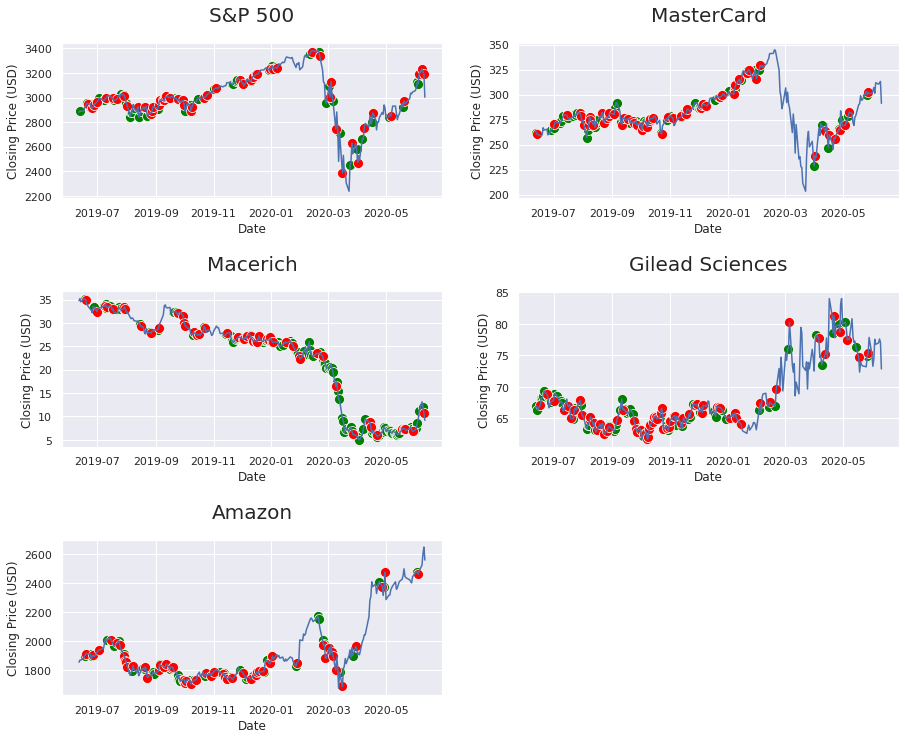

In [12]:
fig, ax = plt.subplots(figsize=(15,12), ncols=2, nrows=3)

wspace =  .2
hspace =  .6

plt.subplots_adjust(
    wspace  =  wspace, 
    hspace  =  hspace
)

sns.lineplot(x = pd.to_datetime(s_and_p_500_info["date"]), y = s_and_p_500_info["close"].astype(float), ci = None, ax=ax[0][0])
sns.scatterplot(x = pd.to_datetime(s_and_p_500_info["buy_date"]), y =  s_and_p_500_info["buy_close"].astype(float), color="green", s=100, ax=ax[0][0])
sns.scatterplot(x = pd.to_datetime(s_and_p_500_info["sell_date"]), y = s_and_p_500_info["sell_close"].astype(float), color="red", s=100, ax=ax[0][0])
sns.lineplot(x = pd.to_datetime(master_card_info["date"]), y = master_card_info["close"].astype(float), ci = None, ax=ax[0][1])
sns.scatterplot(x = pd.to_datetime(master_card_info["buy_date"]), y =  master_card_info["buy_close"].astype(float), color="green", s=100, ax=ax[0][1])
sns.scatterplot(x = pd.to_datetime(master_card_info["sell_date"]), y = master_card_info["sell_close"].astype(float), color="red", s=100, ax=ax[0][1])
sns.lineplot(x = pd.to_datetime(macerich_info["date"]), y = macerich_info["close"].astype(float), ci = None, ax=ax[1][0])
sns.scatterplot(x = pd.to_datetime(macerich_info["buy_date"]), y =  macerich_info["buy_close"].astype(float), color="green", s=100, ax=ax[1][0])
sns.scatterplot(x = pd.to_datetime(macerich_info["sell_date"]), y = macerich_info["sell_close"].astype(float), color="red", s=100, ax=ax[1][0])
sns.lineplot(x = pd.to_datetime(gilead_sciences_info["date"]), y = gilead_sciences_info["close"].astype(float), ci = None, ax=ax[1][1])
sns.scatterplot(x = pd.to_datetime(gilead_sciences_info["buy_date"]), y =  gilead_sciences_info["buy_close"].astype(float), color="green", s=100, ax=ax[1][1])
sns.scatterplot(x = pd.to_datetime(gilead_sciences_info["sell_date"]), y = gilead_sciences_info["sell_close"].astype(float), color="red", s=100, ax=ax[1][1])
sns.lineplot(x = pd.to_datetime(amazon_info["date"]), y = amazon_info["close"].astype(float), ci = None, ax=ax[2][0])
sns.scatterplot(x = pd.to_datetime(amazon_info["buy_date"]), y =  amazon_info["buy_close"].astype(float), color="green", s=100, ax=ax[2][0])
sns.scatterplot(x = pd.to_datetime(amazon_info["sell_date"]), y = amazon_info["sell_close"].astype(float), color="red", s=100, ax=ax[2][0])


# plt.suptitle("Selected stocks", fontsize=20)
ax[0][0].set_title("S&P 500", y=1.1, fontsize=20)
ax[0][1].set_title("MasterCard", y=1.1, fontsize=20)
ax[1][0].set_title("Macerich", y=1.1, fontsize=20)
ax[1][1].set_title("Gilead Sciences", y=1.1, fontsize=20)
ax[2][0].set_title("Amazon", y=1.1, fontsize=20)
ax[2][1].axis("off")
for ax in ax.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price (USD)")
plt.show()

**Figure 11**. Buy and sell actions of the AI visualized for each stock chart (June 12, 2019 until June 11, 2020).

This will be further discussed in the discussion (5.) section.

#### 4.2
There is more that we can do with the data. We can display the percentage return of each trade to see how they are distributed for each stock.

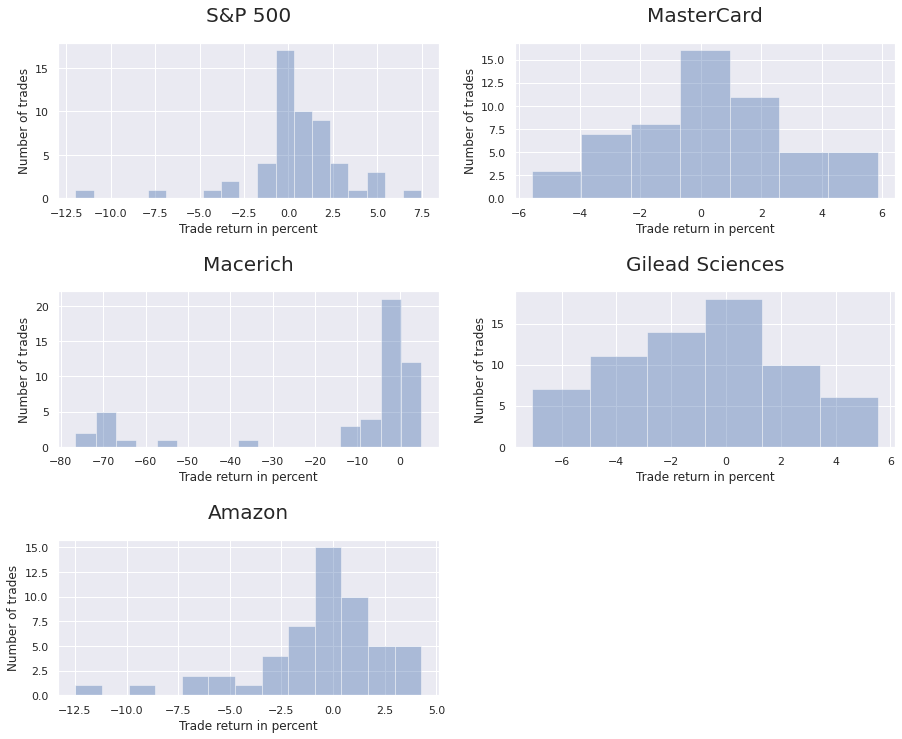

In [13]:
percentage_array_s_and_p = np.divide(s_and_p_500_info["sell_profit"].astype(float), s_and_p_500_info["buy_close"].astype(float))
percentage_array_master_card = np.divide(master_card_info["sell_profit"].astype(float), master_card_info["buy_close"].astype(float))
percentage_array_macerich = np.divide(macerich_info["sell_profit"].astype(float), macerich_info["buy_close"].astype(float))
percentage_array_gilead = np.divide(gilead_sciences_info["sell_profit"].astype(float), gilead_sciences_info["buy_close"].astype(float))
percentage_array_amazon = np.divide(amazon_info["sell_profit"].astype(float), amazon_info["buy_close"].astype(float))

fig, ax = plt.subplots(figsize=(15,12), ncols=2, nrows=3)

wspace =  .2
hspace =  .6

plt.subplots_adjust(
    wspace  =  wspace, 
    hspace  =  hspace
)

sns.distplot(percentage_array_s_and_p.astype(float) * 100, kde=False, ax=ax[0][0])
sns.distplot(percentage_array_master_card.astype(float) * 100, kde=False, ax=ax[0][1])
sns.distplot(percentage_array_macerich.astype(float) * 100, kde=False, ax=ax[1][0])
sns.distplot(percentage_array_gilead.astype(float) * 100, kde=False, ax=ax[1][1])
sns.distplot(percentage_array_amazon.astype(float) * 100, kde=False, ax=ax[2][0])

ax[0][0].set_title("S&P 500", y=1.1, fontsize=20)
ax[0][1].set_title("MasterCard", y=1.1, fontsize=20)
ax[1][0].set_title("Macerich", y=1.1, fontsize=20)
ax[1][1].set_title("Gilead Sciences", y=1.1, fontsize=20)
ax[2][0].set_title("Amazon", y=1.1, fontsize=20)
ax[2][1].axis("off")
for ax in ax.flat:
    ax.set_xlabel("Trade return in percent")
    ax.set_ylabel("Number of trades")
plt.show()

**Figure 12**. Distribution of trade returns in percent for each stock.

The figure shows that the AI generally trades in a way where most trades are near 0% return. Furthermore, we can see that there are trades that lay far from the median. The most off trade is from the Macerich stock with a loss of 76.6%. But also the S&P 500 and the Amazon stock show trades that are over -10% (S&P 500 11.9% and Amazon 12.5%).
Moreover, there are no positive values over 7.5% (S&P 500 7.46%).

#### 4.3
The distribution of the trades are important but we can further look into that data. We can average the return of every trade as a percentage. Furthermore, we can look at the amount of total trades, total buys and total sells. We can also find when the trade with the highest loss of each stock happened.

In [14]:
def concrete_values(stock, percentage_array, name):
    trade_amount = len(pd.Series(stock["sell_profit"]).dropna())
    trade_average = np.average(pd.Series(percentage_array.astype(float) * 100).dropna())
    buy_amount = len(pd.Series(stock["buy_close"]).dropna())
    sell_amount = len(pd.Series(stock["sell_close"]).dropna())
    lowest_trade = stock["sell_date"][np.argmin(stock["sell_profit"].astype(float))]
    return (name, trade_amount, round(trade_average,2), buy_amount, sell_amount, lowest_trade)

s_and_p_values = concrete_values(s_and_p_500_info, percentage_array_s_and_p, "S&P 500")
master_card_values = concrete_values(master_card_info, percentage_array_master_card, "Master Card")
macerich_values = concrete_values(macerich_info, percentage_array_macerich, "Macerich")
gilead_values = concrete_values(gilead_sciences_info, percentage_array_gilead, "Gilead Sciences")
amazon_values = concrete_values(amazon_info, percentage_array_amazon, "Amazon")

table = pd.DataFrame(np.array([s_and_p_values, master_card_values, macerich_values, gilead_values, amazon_values]), columns=["name", "total trades", "average return (%)", "total buys", "total sells", "lowest trade"])
table.head()

,name,total trades,average return (%),total buys,total sells,lowest trade
0,S&P 500,54,0.48,54,54,2020-03-16
1,Master Card,55,0.31,55,55,2019-09-18
2,Macerich,50,-14.77,110,50,2020-04-21
3,Gilead Sciences,66,-0.77,66,66,2019-10-10
4,Amazon,53,-0.75,53,53,2020-02-27


**Figure 13**. Total trades, average trade return in percent (rounded to 2 decimal places), total amount of buy and sell actions and the date for the lowest trade for each stock. 

The table does hold interesting results. First of all, only the Macerich stock was bought more than it was sold. All other stocks do have equal number of buy and sell actions. Nevertheless, this does not interfere with the shown figures or the AI's performance as buy actions that to not have corresponding sell values do nothing. As there is no capital or trading costs, buying is "free". Also, the average return does only integrate total trades. This means that empty buy actions are ignored.  
Another key number is the Macerich's average return of -14.77% per trade. All other stock have average returns ranging between -0.75% and 0.48%.  

This figure will be further discussed in section 5.

#### 4.4
We can inspect this data even further. By multiplying the average return with the amount of total trades, we get the overall percentage loss or gain for each stock. We can now display a ranking of how the AI traded each stock as a profit or loss percentage.

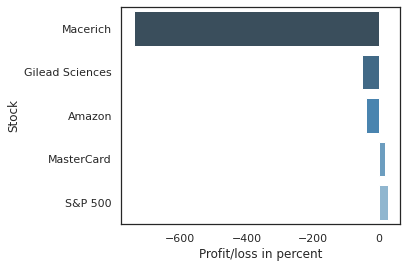

In [15]:
profit_all_stocks = pd.DataFrame({"Stock": ["Macerich", "Gilead Sciences", "Amazon", "MasterCard", "S&P 500"], "Profit": [macerich_values[2]*macerich_values[1],gilead_values[2]*gilead_values[1],amazon_values[2]*amazon_values[1],master_card_values[2]*master_card_values[1],s_and_p_values[2]*s_and_p_values[1]]})

sns.set(style="white", palette="muted")
fig, ax = plt.subplots(figsize = (5,4))
sns.barplot(x="Profit", y="Stock", data = profit_all_stocks, palette="Blues_d")
ax.set_xlabel("Profit/loss in percent")
plt.show()

**Figure 14**. Bar chart of the overall profit or loss of each stock in percent.

With a value of -738.5%, the performance of the AI on the Macerich stock is very bad. In contrast to that, the highest value is of the S&P 500 with 26%.
This data will be significant for the discussion (5.).

#### 4.5
To understand the contrast of the percentages better, the stock charts have to be compared. To do that, we will leverage figure 3 but only show the S&P 500 chart and the Macerich chart. I will also draw two lines for the day where each stock traded its highest loss.

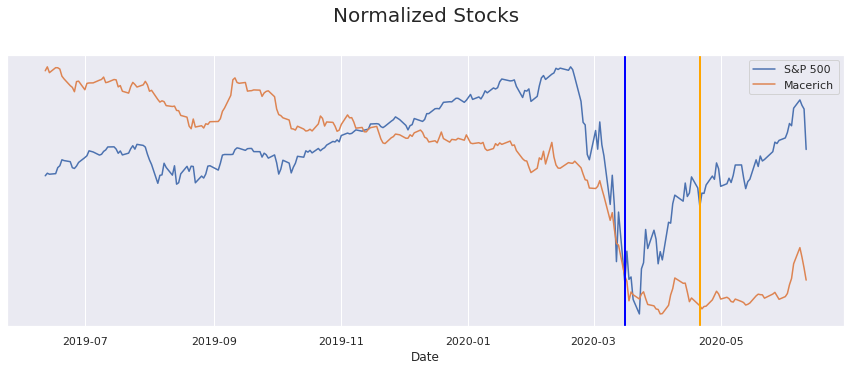

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Normalized Stocks", y=1.1, fontsize=20)

sns.lineplot(x = pd.to_datetime(s_and_p_500_info["date"]), y = s_and_p_500_norm, ax=ax, label="S&P 500")
sns.lineplot(x = pd.to_datetime(macerich_info["date"]), y = macerich_norm, ax=ax, label="Macerich")

ax.set_yticks([])
ax.set_xlabel("Date")
ax.axvline(pd.Timestamp('2020-03-16'), color="blue", linewidth=2)
ax.axvline(pd.Timestamp('2020-04-21'), color="orange", linewidth=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

**Figure 15**. Normalized charts of the S&P 500 and Macerich stock. Blue line indicates the day of the lowest trade of the S&P 500 stock, orange line for the Macerich stock. 

Here, the oppopsite development is nicely displayed. Especially, the negative linear development of the Macerich stock in contrast to the S&P 500 should be reminded. The takeaway here is the general unsimilarity of both chart developments.  
For the S&P 500, the worst trade was on the 16th of March 2020. For the Macerich stock, the day was the 21st of April 2020.  
This will be interpreted in the discussion section (5.).

#### 4.6
Finally, as each stock was traded four times, we can look at all four iterations for the S&P 500 and the Macerich stock to see if each iteration has a similar result.

In [17]:
s_and_p_500_info.iloc[:4, [7]]

,profit_average
0,741.879638
1,65.360105
2,-140.850097
3,9.250000


**Figure 16**. Total profit for each epoch of the S&P 500 stock.

In [18]:
macerich_info.iloc[:4, [7]]

,profit_average
0,-184.940007
1,-8.390000
2,-52.950004
3,-21.369999


**Figure 17**. Total profit for each epoch of the Macerich stock.

We can see that both do not have consistent results. The range from +742 USD to -141 USD for the S&P 500 stock is unacceptable. Macerich's range from -185 USD to -8 USD is better but still not consistent.  

We can use this, as well as the other results to answer the question that we asked in the beginning.

### 5. Discussion

The question from the beginning was if whether we could use the datasets returned by the AI to reason if the AI can outperform the development of stock market indices.
The results denote a clear answer to this: No we cannot.

As shown in figure 1, the data that the AI was trained on is an overall linear chart. Nevertheless, there are two negative corrections noticeable that need to be inspected. The first one (figure 1, red line) is dated on the 21st of December 2019 and the trigger was the concern regarding a partial U.S. government shutdown. The second, even greater correction, is dated on the 23rd of March 2020. This one is triggered by the COVID-19 pandemic. This is not to ignore as this is the data the AI is trained on. Even though the general chart development can be nicely expressed with a linear regression, the corrections do play their part. This is because the AI is trained by looking at a window of ten past days and then deciding for the next one (3.3). This means that the AI should be able to trade volatile stocks. 
We can now take a look at the worst trades for the best and worst traded stock (S&P 500 and Macerich).  For both, this occurred during the COVID-19 pandemic. As the market made irrational developments during that time, the AI made irrational trading decisions.  This invalidates the previous argument that the AI should be able to trade volatile stocks. As we only train the AI, we do not control the exact process of how it chooses its actions. This means that, even though we excepted the behavior that the AI can trade volatile stocks, it maybe cannot. We have to look at more results to surely assess that.

Figure 14 in connection with figure 15 indicates that a stock development that is not similar to the trained data is not tradable by the AI. A loss of 738.5% is far too great.
In contrast to that, we can look at the S&P500 stock that was traded with an overall gain of 26% (figure 13). That sounds great and also supports the argument of the last paragraph since the S&P 500 chart has a linear development and the Macerich chart a negative linear one but that number is only associated with the first epoch.
Looking at figure 16, we can see that there is one epoch with a loss of -140 USD. That indicates a lack of consistency of the AI.  

Moreover, this makes the first statement that only stocks with linear, non volatile charts can be traded obsolete. With only one epoch that was returned in detail and three more where only the profit is given, the datasets returned by the AI for each stock are too small.  
Thus, this argument also indicates a lack of quality of the returned datasets. Resulting from this, the argument of the previous paragraph is invalidated, as well. As the datasets only hold the detailed information of one evaluation epoch, we cannot know if the worst trades of every epoch happened during the COVID-19 pandemic.  


This is also supported by interpreting figure 11. There, the inconsistency of the AI can be seen based on trade actions made during the COVID-19 pandemic. As the stock development becomes more volatile, the AI decides to hold (MasterCard and Gilead Sciences). In contrast to that, for the Macerich stock, the AI's buy decision is dominant. The COVID-19 pandemic and its impact on the stock market surely reinforce this inconsistency but an AI should and has to be able to trade that volatility. Otherwise, the AI is connected with inconsistent behavior. This again indicates that we can only assess those trading decisions by comparing many results of different evaluation epochs and therefore, have not sufficient enough datasets.


The dataset for each stock holds all the information that the AI gives us. As shown in the result section (4.), it gives us the possibility to evaluate the AI in regards to that stock or the combination of different stocks. But what if the stocks change? I chose the stocks myself and I could have chosen five other ones. This has to be kept in mind. The chosen stocks do change the AI returned datasets and thus, do change the evaluation. This comes to the same result as the previous paragraphs. The returned datasets are not sufficient and consistent enough to assess the AI.
The only way how this problem can be solved is if I evaluate the AI with multiple different stocks. In the best case, the AI would trade all 500 stocks of the S&P 500. Moreover, each stock should have multiple epochs. The more the better, as the average becomes more precise for more epochs. Nonetheless, there is a reason why this did not happen:
After training the AI, each stock evaluation (4 epochs) took about 60 minutes (as stated in 3.5). This means that once configured, an evaluation process of only 5 stocks already took five hours. In addition to that, the computer was not useable during this time and was consuming a lot of power.  

With that being said, there is a clear data generation limitation. There may be data online but this report refers to the AI that we coded and trained. This means that only data that is generated by the AI can be used to evaluate it.  

### 6. Conclusion
Data is necessary to reason about something. In our case, the data that contains five different stocks can help us to explore the decision-making process of the AI in a limited way.
The same data highlights the importance of large datasets to assess questions like the one we asked ourselves for this report. Furthermore, this emphasizes that training and evaluating AIs is not easy. A large amount of data and computing power is necessary to find consistent results. Especially for AIs that should be used in real-world scenarios like ours, this is of major importance.
<br>
<br>
If an AI will ever be able to predict the stock market in a consistent way, is still an open question.

### 7. References
[1] https://novelinvestor.com/investors/national-press-club-luncheon-speech/  

[2] Playing Atari with Deep Reinforcement Learning, https://arxiv.org/pdf/1312.5602.pdf  

[3] https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC